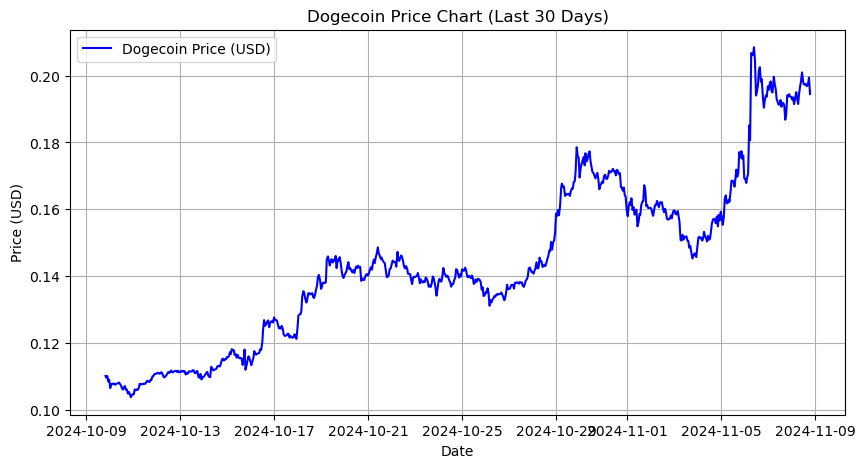

In [7]:
import requests
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, StringVar, OptionMenu
import datetime

# تابع برای دریافت داده‌های قیمتی از CoinGecko
def get_crypto_price_history(crypto_id, days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency=usd&days={days}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        prices = data["prices"]
        return prices
    else:
        print("Failed to retrieve data.")
        return None

# تابع برای رسم نمودار قیمت
def plot_crypto_price(crypto_id):
    prices = get_crypto_price_history(crypto_id)
    
    if prices:
        dates = [datetime.datetime.fromtimestamp(price[0] / 1000) for price in prices]
        values = [price[1] for price in prices]

        plt.figure(figsize=(10, 5))
        plt.plot(dates, values, label=f"{crypto_id.capitalize()} Price (USD)", color="blue")
        plt.title(f"{crypto_id.capitalize()} Price Chart (Last 30 Days)")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("No data to plot.")

# تنظیمات GUI
def on_select_crypto():
    selected_crypto = crypto_var.get()
    plot_crypto_price(selected_crypto)

# ساخت پنجره اصلی با tkinter
root = Tk()
root.title("Cryptocurrency Price Chart Viewer")

Label(root, text="Select Cryptocurrency:").pack()

# ایجاد منوی کشویی با رمز ارزهای معروف
crypto_var = StringVar(root)
crypto_var.set("bitcoin")  # مقدار پیش‌فرض

cryptos = ["bitcoin", "ethereum", "litecoin", "cardano", "dogecoin"]
dropdown = OptionMenu(root, crypto_var, *cryptos)
dropdown.pack()

# دکمه برای نمایش نمودار
Button(root, text="Show Price Chart", command=on_select_crypto).pack()

root.mainloop()
